# Linear Regression Practice

In this lab we are going to use a 1994 dataset that has detailed prices on items sold at over 400 Burguer King, Wendy's, KFC and Roy Roger restaurants in New Jersey and Pennsivania.

Roy Roger https://en.wikipedia.org/wiki/Roy_Rogers_Restaurants


The data set has zip-code level data on various items prices, characterisitics of the zip code population.

The idea with this exercise is to see wheter fast-food restaurants charge higher prices in areas with a larger concentration of African Americans. 

### Data Set Characteristics:  
K. Graddy (1997), "Do Fast-Food Chains Price Discriminate on the Race and Income Characteristics of an Area?" Journal of Business and Economic Statistics 15, 391-401.
http://people.brandeis.edu/~kgraddy/published%20papers/GraddyK_jbes1997.pdf

    :Number of Instances: 410
    
    :Attribute Information
    
    psoda         price of medium soda, 1st wave
    pfries        price of small fries, 1st wave
    pentree       price entree (burger or chicken), 1st wave
    wagest        starting wage, 1st wave
    nmgrs         number of managers, 1st wave
    nregs         number of registers, 1st wave
    hrsopen       hours open, 1st wave
    emp           number of employees, 1st wave
    psoda2        price of medium soday, 2nd wave
    pfries2       price of small fries, 2nd wave
    pentree2      price entree, 2nd wave
    wagest2       starting wage, 2nd wave
    nmgrs2        number of managers, 2nd wave
    nregs2        number of registers, 2nd wave
    hrsopen2      hours open, 2nd wave
    emp2          number of employees, 2nd wave
    compown       =1 if company owned
    chain         BK = 1, KFC = 2, Roy Rogers = 3, Wendy's = 4
    density       population density, town
    crmrte        crime rate, town
    state         NJ = 1, PA = 2
    prpblck       proportion black, zipcode
    prppov        proportion in poverty, zipcode
    prpncar       proportion no car, zipcode
    hseval        median housing value, zipcode
    nstores       number of stores, zipcode
    income        median family income, zipcode
    county        county label
    lpsoda        log(psoda)
    lpfries       log(pfries)
    lhseval       log(hseval)
    lincome       log(income)
    ldensity      log(density)
    NJ            =1 for New Jersey
    BK            =1 if Burger King
    KFC           =1 if Kentucky Fried Chicken
    RR            =1 if Roy Rogers


In [1]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

#### 1. Read the data, print the last 5 rows, perform EDA (missing values, data types, describe)

In [2]:
path_to_file = '/Users/tlee010/desktop/dsi-sf-2-timdavidlee/datasets/fast_food_chains/discrim.csv' ## Change it to your path
fast_food = pd.read_csv(path_to_file)
fast_food.head()

,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,psoda2,pfries2,...,county,lpsoda,lpfries,lhseval,lincome,ldensity,NJ,BK,KFC,RR
0,1.12,1.06,1.02,4.25,3.0,5.0,16.0,27.5,1.11,1.11,...,18,0.113329,0.058269,11.90699,10.70401,8.301521,1,0,0,1
1,1.06,0.91,0.95,4.75,3.0,3.0,16.5,21.5,1.05,0.89,...,18,0.058269,-0.094311,11.90699,10.70401,8.301521,1,1,0,0
2,1.06,0.91,0.98,4.25,3.0,5.0,18.0,30.0,1.05,0.94,...,12,0.058269,-0.094311,12.03884,10.62532,9.341369,1,1,0,0
3,1.12,1.02,1.06,5.00,4.0,5.0,16.0,27.5,1.15,1.05,...,10,0.113329,0.019803,12.05292,10.82707,9.029418,1,0,0,1
4,1.12,NaN,0.49,5.00,3.0,3.0,16.0,5.0,1.04,1.01,...,10,0.113329,NaN,12.42561,11.18840,6.579251,1,1,0,0


#### 2. The variable/feature psoda has eight missing observations. Replace those missing observations with the average price of soda per chain ( you will have to find which chain is missing psoda values)

In [3]:
#print fast_food.isnull().sum()

# need to dump 8 values
def map_avg_psoda_values(x):
    print '------'
    local_mean = x.mean()
    x.fillna(local_mean)
    return x
#     if x.isnull():
#         print x
#fast_food.groupby('chain')[['psoda']].apply(map_avg_psoda_values)

fast_food["psoda"] = fast_food.groupby("chain").transform(lambda x: x.fillna(x.mean()))
fast_food.describe()

/Users/tlee010/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,psoda2,pfries2,...,county,lpsoda,lpfries,lhseval,lincome,ldensity,NJ,BK,KFC,RR
count,410.000000,393.000000,398.000000,390.000000,404.000000,388.000000,410.000000,404.000000,388.000000,382.000000,...,410.000000,402.000000,393.000000,409.000000,409.000000,409.000000,410.000000,410.000000,410.000000,410.000000
mean,1.045437,0.921985,1.322186,4.615641,3.420297,3.608247,14.439024,17.621906,1.044948,0.941230,...,13.658537,0.040321,-0.087813,11.828533,10.719937,7.958750,0.807317,0.417073,0.195122,0.241463
std,0.087976,0.105881,0.643085,0.347015,1.018408,1.243540,2.809987,9.423264,0.093567,0.109304,...,8.045439,0.084730,0.115152,0.389349,0.284479,0.995858,0.394888,0.493678,0.396779,0.428493
min,0.730000,0.670000,0.490000,4.250000,1.000000,1.000000,7.000000,3.000000,0.410000,0.690000,...,1.000000,-0.314711,-0.400477,10.431170,9.675268,5.093750,0.000000,0.000000,0.000000,0.000000
25%,0.982500,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,...,6.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000
50%,1.060000,NaN,NaN,NaN,NaN,NaN,15.500000,NaN,NaN,NaN,...,14.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000
75%,1.090000,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,...,20.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000
max,1.490000,1.270000,3.950000,5.750000,10.000000,8.000000,24.000000,80.000000,1.400000,1.370000,...,29.000000,0.398776,0.239017,13.067700,11.824290,10.631930,1.000000,1.000000,1.000000,1.000000


#### 3. In one graph, plot the distribution of 'psoda' for each chain (4 histograms in one graph) add different colors per histogram, label each histogram, locate the legend on the 'upper left' side of your chart. Are there any similarities or differences in their distributions?



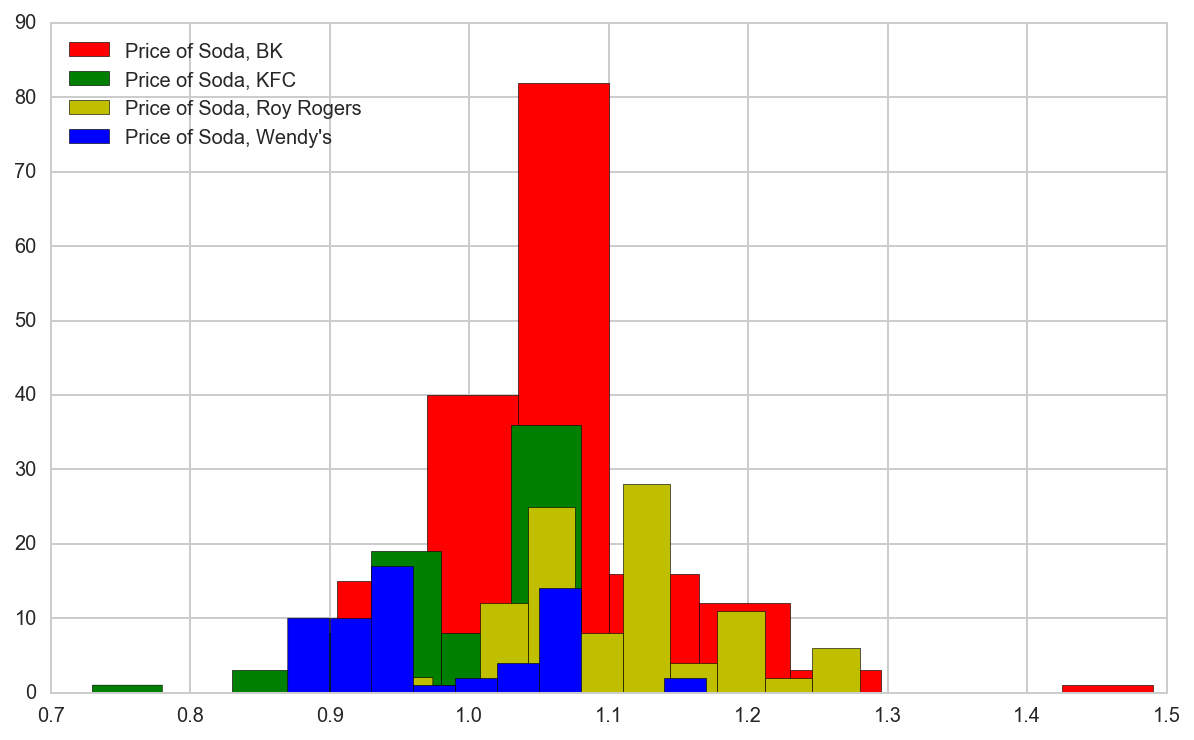

In [4]:
fig = plt.figure(figsize=(10,6))
fast_food[fast_food['chain']==1]['psoda'].hist(color='r', label='Price of Soda, BK')
fast_food[fast_food['chain']==2]['psoda'].hist(color='g', label='Price of Soda, KFC')
fast_food[fast_food['chain']==3]['psoda'].hist(color='y', label='Price of Soda, Roy Rogers')
fast_food[fast_food['chain']==4]['psoda'].hist(color='b', label= "Price of Soda, Wendy's")

plt.legend(loc='upper left')
plt.show()

#### 4. The variable income has one missing value. First, identify to what state "NJ=1 or PA=2" this missing value belongs to. Then drop the "row " that corresponds to this missing value fast_food.drop("row_number", axis=0)

In [5]:
fast_food.loc[fast_food['income'].isnull()] 
fast_food = fast_food.drop(384, axis=0) 

#### 5. Graph the distribution of psoda for the entire dataset and include a line for the average in your graph.

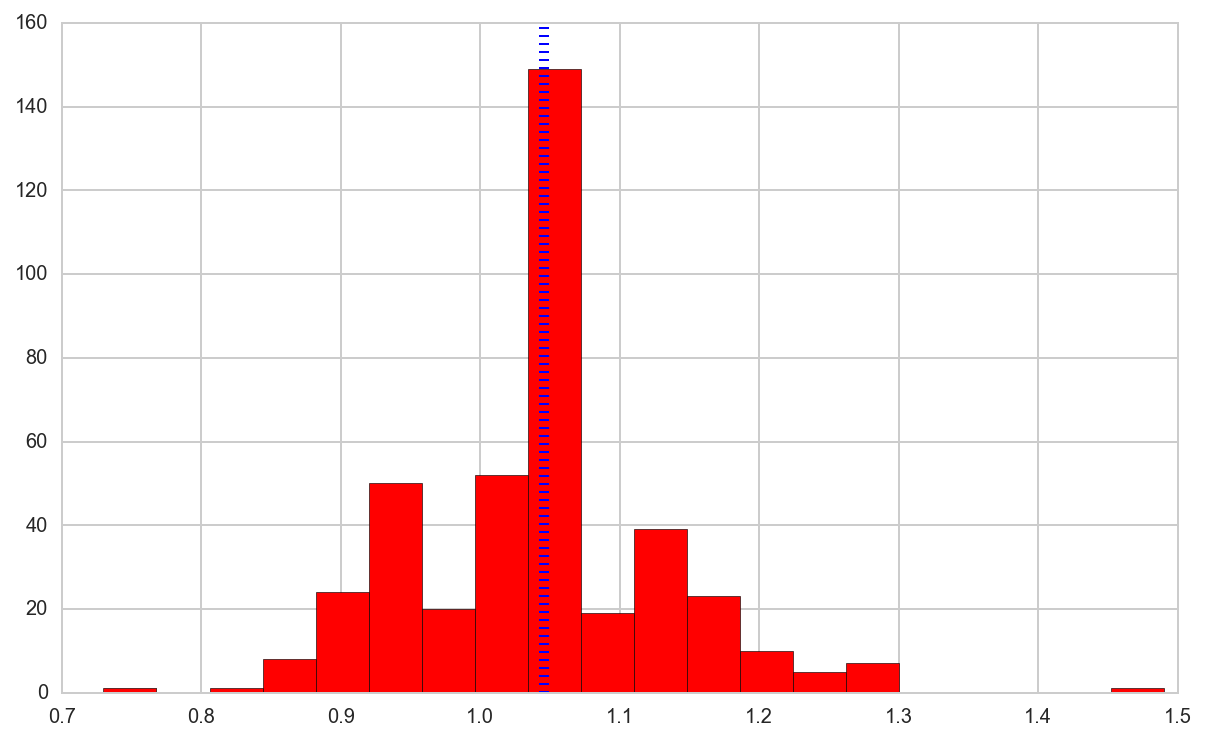

In [6]:
ig = plt.figure(figsize=(10,6))
result = plt.hist(fast_food['psoda'], bins=20, color='r')
plt.axvline(fast_food['psoda'].mean(), color='b', linestyle='dotted', linewidth=5)

#### 6. Find the average values of _prpblck_ and _income_ in the sample, along with their standard deviations. Can you infer the units of measurement of these two variables (Get used to do this, these are your baseline values)

In [7]:
print fast_food['prpblck'].mean()
# proportion of black folks %
print fast_food['income'].mean()
# income in $

0.113486395844
47053.7848411



### Linear Regressions

#### 7.  Consider a model to explain the price of soda _psoda_, in terms of the proportion of the African American population and the median income
    
    psoda = β0 + β1prpblck + β2income + e


In [18]:
# Define your linear model 
lm = linear_model.LinearRegression()

base_data = fast_food[['prpblck','income']].copy()
target = fast_food['psoda'].copy()

# Define the target variable, called it y
y = target
print y.shape

# Define your predictors, called them X
x = base_data
print x.shape

# Print the shapes of your y and X

print base_data

(409,)
(409, 2)
      prpblck   income
0    0.171154  44534.0
1    0.171154  44534.0
2    0.047360  41164.0
3    0.052839  50366.0
4    0.034480  72287.0
5    0.059133  44515.0
6    0.018677  62056.0
7    0.004906  53655.0
8    0.921056  31314.0
9    0.921056  31314.0
10   0.921056  31314.0
11   0.921056  31314.0
12   0.921056  31314.0
13   0.013911  38569.0
14   0.010212  60657.0
15   0.010212  60657.0
16   0.006090  47891.0
17   0.003541  36705.0
18   0.010452  43022.0
19   0.007387  79025.0
20   0.007387  79025.0
21   0.120063  65296.0
22   0.433610  56893.0
23   0.022127  40719.0
24   0.022127  40719.0
25   0.696365  33306.0
26   0.055731  59266.0
27   0.055731  59266.0
28   0.032352  57424.0
29   0.032352  57424.0
..        ...      ...
379  0.052368  46886.0
380  0.011523  45160.0
381  0.022145  40648.0
382  0.008476  46705.0
383  0.061870  43047.0
385  0.121059  45763.0
386  0.121059  45763.0
387  0.185530  40370.0
388  0.185530  40370.0
389  0.185530  40370.0
390  0.185530  403

In [19]:
# Fit your model
mymodel = lm.fit(x,y)

# Predict your y, call them predictions, print the shape of predictions
y_pred = mymodel.predict(x)

# Print the shape of predictions
print y_pred.shape





(409,)


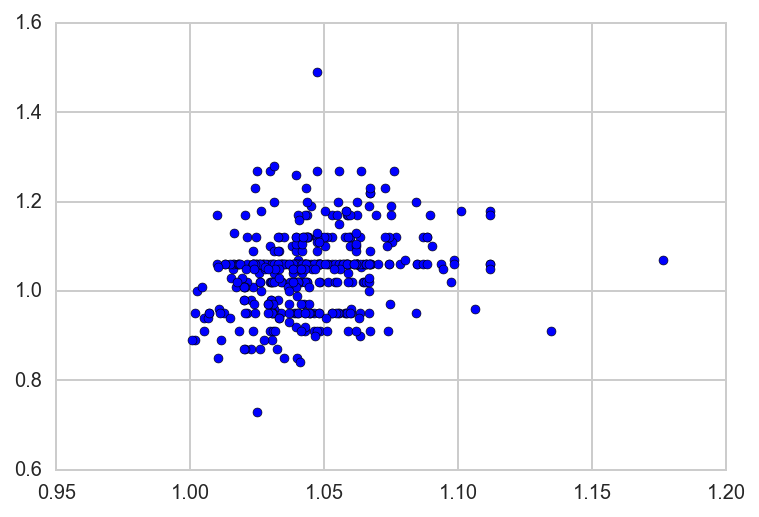

In [20]:
## Is there a difference between the means for actual values (psoda) and your predictions



In [29]:
## Construct a scatter plot of your model. Use your predicted values as your y axis and your y values as your x axis

## Print the Mean Square error see/read this link 
from sklearn.metrics import mean_squared_error
print mean_squared_error(y, y_pred)

## http://mste.illinois.edu/patel/amar430/meansquare.html






<class 'pandas.core.series.Series'> (409,)
<type 'numpy.ndarray'> (409,)
0.00724966165558
(409,)
(409,)


In [30]:
## What is the coefficient of determination (R^2) of the prediction. In other words,what is the accuracy of your model?
score = mymodel.score(x,y)
print score

0.0633197857093


In [35]:
## Print the estimated coefficients of your model.
print mymodel.coef_

[  1.13185366e-01   1.59318232e-06]


In [36]:
## What is the intercept of your model.
print mymodel.intercept_

0.957615682412


In [42]:
## Write your results in equation form, include the sample size and R^2
## Interpret the coefficient on prpblck

#y = 0.957 + 0.113 x1 + 0.00000159 x2
print x.describe()
# mean of x1(prpblk) = 0.113
# mean of x2(income) = ~47000k

# the coefficient of prpblk is almost exactly the mean of the data
# .113 X .113 = 0.012769
# .00000159 * 47000 = 0.07473

# the intercept is the dominant value


          prpblck         income
count  409.000000     409.000000
mean     0.113486   47053.784841
std      0.182416   13179.286069
min      0.000000   15919.000000
25%      0.011649   37883.000000
50%      0.041444   46272.000000
75%      0.121059   54981.000000
max      0.981658  136529.000000
0.012769
0.07473


### 8.  Compare the estimate from question 7 with a simple regression estimate from _psoda_ on _prpblck_. Is the discrimination effect larger or smaller when you control/include income on your predictors?
    
    psoda = β0 + β1prpblck + e

In [45]:
# Define your predictors and called them X
base_data2 = fast_food[['prpblck']].copy()

# Print the shapes of your y and X
x2 = base_data2.copy()
print x2.shape
print y.shape


(409, 1)
(409,)


In [46]:
# Fit your model
mymodel2 = lm.fit(x2,y)


In [48]:
# find the predictors and called them predictions
# print the shape of predictions
y_pred2 = mymodel2.predict(x2)
print y_pred2.shape


(409,)


In [49]:
## Is there a difference between the means for actual values (psoda) and your predictions
print y_pred2.mean()
print y.mean()

# no difference

1.0454259397
1.0454259397


0.00760680000723


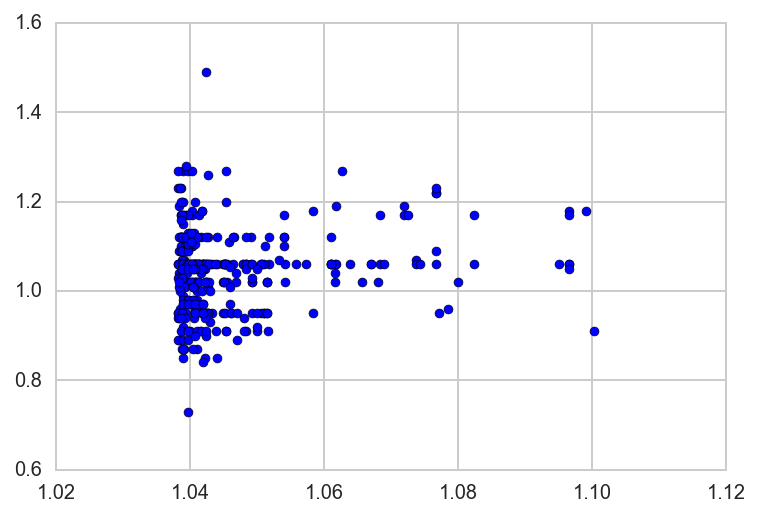

In [52]:
## Construct a scatter plot of your model. Use your predicted values as your y axis and your y values as your x axis
## Print the Mean Square error 
plt.scatter(y_pred2, y)
print mean_squared_error(y, y_pred2)

In [55]:
## What is the accuracy of your model?
score2 = mymodel2.score(x2,y)
print score2

0.0171763318978


In [57]:
## Print the estimated coefficients for the linear regression problem
print mymodel2.coef_


[ 0.06328429]


In [56]:
## What is the intercept of your model.
print mymodel2.intercept_


1.03824403319


In [58]:
## Write your results in equation form, include the sample size and R^2
#y = 1.038 + 0.0633 prpblk
# 409 samples
# scoe: 0.017
print len(x2)


409


#### 9.  Now Use StatsModel and repeat questions 7 and 8
http://statsmodels.sourceforge.net/devel/example_formulas.html

##### Helpful Notes to Keep in mind:
1. P value for a coefficient says nothing about the size of the effect that variable is having on your dependent variable - it is possible to have a highly significant result (very small P-value) for a miniscule effect.
2. With a P value of 5% (or .05) there is only a 5% chance that results you are seeing would have come up in a 
random distribution, so you can say with a 95% probability of being correct that the variable is having some effect, assuming your model is specified correctly.
3. In simple or multiple linear regression, the size of the coefficient for each independent variable gives you 
the size of the effect that variable is having on your dependent/target (y) variable, and the sign on the coefficient 
(positive or negative) gives you the direction of the effect. In regression with a single independent/predictor variable, the coefficient tells you how much the dependent variable is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when that independent variable increases by one unit. 
4. In regression with multiple independent/predictors variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one unit, "_holding all the other independent variables constant_". Remember to keep in mind the units which your variables are measured in.

In [ ]:
import statsmodels.formula.api as smf


#### 10. There is one fundamental step that I have "purposely" left out? Can you guess what this step is, and implement it. Use Matplotlib and Seaborn (regplot) to graph hem.

### Before you move to the next question, read this article "Why I'm not a fan of R-Squared"
http://www.johnmyleswhite.com/notebook/2016/07/23/why-im-not-a-fan-of-r-squared/

### Bonus
#### 11. Report the estimates of the follwing model (use sklearn):
    log(psoda) = β0 + β1prpblck + β2log(income) + e


In [ ]:
## If there are missing observations on any of the log variables, would you dropped them
## from the dataset, if so how does this impact your calculations?
## Fill the missing values of lpsoda with 0


In [ ]:
## Plot a histogram that will have 2 histograms showing the distribution of psoda and lpsoda
## Are they the same?


In [ ]:
## Plot a histogram of the variable log of income (lincome)


In [ ]:
## Plot a histogram of the variable income 


In [ ]:
## Can you explain what log is doing to the variables (income, and price of soda (psoda))

In [ ]:
## In one graph use seaborn regplot to graph
## graph psoda, vs lincome
## graph lpsoda vs income
## graph lpsoda vs lincome


In [ ]:
## graph lpsoda vs income


In [ ]:
# graph lpsoda vs lincome


In [ ]:
# Define your linear model 


# Define the target variable, called it y



# Define your predictors, called them X


# Print the shapes of your y and X




In [ ]:
# Fit your model


# Predict your y, call them predictions, print the shape of predictions
# Print the shape of predictions


In [ ]:
## Graph your predicted and y values


In [ ]:
## Print the coefficients, and R2, interpret your result 
## See/read this link for interpretation of results/coeficients: 
## http://www.ats.ucla.edu/stat/mult_pkg/faq/general/log_transformed_regression.htm



## Do you think that is model is more appropriate? 

In [ ]:
## Now add the variable prppov to the regression in question 11, What happened with prpblck?

# Define your linear model 


# Define the target variable, called it y



# Define your predictors, called them X


# Print the shapes of your y and X


In [ ]:
# Fit your model


# Predict your y, call them predictions, print the shape of predictions
# Print the shape of predictions

## Print the coefficients, and R2, interpret your result


In [ ]:
## Find the correlatoion between log(income) and prpov. Is it close to what you expected?


In [ ]:
## What are your thoughts on this statement:
## "Because log(income) and prppov are so highky correlated, they have no business in being 
## included in the same regression"